hugging face Ìä∏ÎûúÏä§Ìè¨Î®∏Îäî ÏïÑÌÇ§ÌÖçÏ≥êÏôÄ ÏûëÏóÖÎßàÎã§ Ï†ÑÏö© ÌÅ¥ÎûòÏä§Î•º Ï†úÍ≥µÌï®  
ÏùºÎ∞òÏ†ÅÏúºÎ°ú <"ModelName">For<"Task"> ÌòïÏãùÏùÑ Îî∞Î¶Ñ  
AutoModel ÌÅ¥ÎûòÏä§Î•º ÏÇ¨Ïö©ÌïòÎäî Í≤ΩÏö∞ AutoModelFor<"Task"> ÌòïÏãùÏûÑ  
ÏßÄÍ∏à ÏÇ¨Ïö©ÌïòÎ†§ÎäîÍ±¥ NERÏù¥ÎãàÍπå NERÏù¥ Îì§Ïñ¥Í∞àÍπå?


ÌïòÏßÄÎßå ÎÇ¥Í∞Ä ÏõêÌïòÎäî taskÍ∞Ä ÏóÜÎã§Î©¥ Ïñ¥ÎñªÍ≤å Îê†Íπå? Î©òÎ∂ïÏôÄÏÑú Ïñ¥ÎñªÍ≤å ÏßÅÏ†ë ÎßåÎì§ÏßÄ Í≥†ÎØºÌïòÍ≤åÎê®  
Ïù¥Î•º ÏúÑÌï¥ hugging faceÎäî Ìó¨Ìçº Ìï®ÏàòÎ•º ÌÜµÌï¥ Ïª§Ïä§ÌÖÄÌï† Ïàò ÏûàÏùå

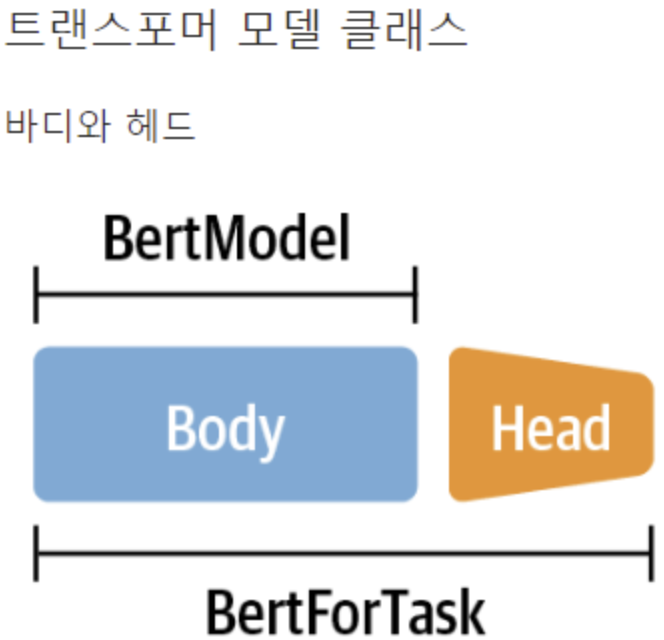

Ìä∏ÎûúÏä§Ìè¨Î®∏Ïùò Í∞ÄÏû• ÌÅ∞ Ïû•Ï†êÏù¥ÎùºÍ≥† ÏÉùÍ∞ÅÌïòÎäî Î™®Îç∏Ïùò Íµ¨Ï°∞  
BodyÎäî Ïù¥ÎØ∏ ÎåÄÏö©Îüâ Îç∞Ïù¥ÌÑ∞Î°ú ÏÇ¨Ï†Ñ ÌïôÏäµÏù¥ Îêú Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÍ≥† ÎßàÏßÄÎßâ HeadÎ•º ÎÇ¥Í∞Ä ÏõêÌïòÎäî taskÎ°ú ÌïôÏäµÏùÑ ÏãúÏºúÎ≤ÑÎ¶º  
Îî∞ÎùºÏÑú ÎÇ¥Í∞Ä ÏõêÌïòÎäî ÌäπÏ†ï taskÏóê ÎßûÎäî Î™®Îç∏Î°ú Î≥ÄÍ≤ΩÍ∞ÄÎä•  

In [1]:
!git clone https://github.com/rickiepark/nlp-with-transformers.git
%cd nlp-with-transformers
from install import *
install_requirements(chapter=4)

Cloning into 'nlp-with-transformers'...
remote: Enumerating objects: 653, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 653 (delta 47), reused 15 (delta 8), pack-reused 569
Receiving objects: 100% (653/653), 62.41 MiB | 14.65 MiB/s, done.
Resolving deltas: 100% (335/335), done.
Updating files: 100% (118/118), done.
/content/nlp-with-transformers
‚è≥ Installing base requirements ...
‚úÖ Base requirements installed!
Using transformers v4.41.2
Using datasets v2.20.0
Using accelerate v0.31.0
Using sentencepiece v0.1.99
Using seqeval


In [2]:
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput
from transformers.models.roberta.modeling_roberta import RobertaModel
from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel

class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
    config_class = XLMRobertaConfig #ÌëúÏ§Ä XLM-R ÏÑ§Ï†ïÏùÑ Í∞ÄÏ†∏Ïò¥

    def __init__(self, config):
        super().__init__(config) #RobertaPreTrainedModel ÌÅ¥ÎûòÏä§ Ï¥àÍ∏∞Ìôî
        self.num_labels = config.num_labels #Î∂ÑÎ•òÌï† Î†àÏù¥Î∏î Í∞ØÏàò ÏÑ§Ï†ï
        self.roberta = RobertaModel(config, add_pooling_layer=False) #Robert a Î™®Îç∏ Í∞ÄÏ†∏ÏôÄÏÑú Î°úÎìúÌï¥Ï§å add_pooling_layerÏùÄ Í∏∞Î≥∏ true
        #ÎßåÏïΩ TrueÎùºÎ©¥ Ï≤´ Î≤àÏß∏ ÌÜ†ÌÅ∞Ïùò ÏùÄÎãâ ÏÉÅÌÉúÎßå Î∞ÄÏßë Ï∏µÍ≥º ÌôúÏÑ±Ìôî Ìï®ÏàòÏóê ÌÜµÍ≥º
        #FALSEÏù¥ÎØÄÎ°ú Î™®Îì† ÌÜ†ÌÅ∞Ïùò ÏùÄÎãâ ÏÉÅÌÉúÎ•º Ï∂úÎ†•
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)

        self.init_weights()# Î™®Îç∏Ïùò Î∞îÎîîÎäî ÌïôÏäµÎêú Í∞ÄÏ§ëÏπò Î°úÎìú Ìó§ÎìúÎ•º ÎûúÎç§ÌïòÍ≤å Ï¥àÍ∏∞

    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None,
                labels=None, **kwargs):
        # Î™®Îç∏ Î∞îÎîîÎ•º ÏÇ¨Ïö©Ìï¥ Ïù∏ÏΩîÎçî ÌëúÌòÑÏùÑ ÏñªÏäµÎãàÎã§.
        outputs = self.roberta(input_ids, attention_mask=attention_mask,
                               token_type_ids=token_type_ids, **kwargs)
        # Ïù∏ÏΩîÎçî ÌëúÌòÑÏùÑ Ìó§ÎìúÏóê ÌÜµÍ≥ºÏãúÌÇµÎãàÎã§.
        sequence_output = self.dropout(outputs[0]) #Ïó¨Í∏∞ÏÑú Ïôú [0]ÏùÑ ÎÑ£Ïñ¥Ï£ºÏßÄ ÏùºÎ∞òÏ†ÅÏúºÎ°ú Í∑∏ÎÉ• Ï∂úÎ†•ÏùÑ ÎÑ£ÎçòÎç∞
        # [batch,seq,hiden]Í∞ôÏù¥ 3Ï∞®ÏõêÏù¥ ÏïÑÎãåÍ∞Ä? Îß® Ïïû Ï∞®ÏõêÏóê 1Ïù¥ Ï∂îÍ∞Ä ÎêúÎìØ? ÎÇòÏ§ëÏóê Ï∂úÎ†• Ï∞®ÏõêÏùÑ ÌîÑÎ¶∞Ìä∏Ìï¥Î¥êÏïº Ìï®
        logits = self.classifier(sequence_output)
        # ÏÜêÏã§ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
        # Î™®Îç∏ Ï∂úÎ†• Í∞ùÏ≤¥Î•º Î∞òÌôòÌï©ÎãàÎã§.
        return TokenClassifierOutput(loss=loss, logits=logits,
                                     hidden_states=outputs.hidden_states,
                                     attentions=outputs.attentions)

![image.png](attachment:12764f22-201a-490d-b93a-1958c3c34216.png)

In [3]:
from collections import defaultdict
from datasets import DatasetDict
from datasets import load_dataset
langs = ["de", "fr", "it", "en"]
fracs = [0.629, 0.229, 0.084, 0.059]
# ÌÇ§Í∞Ä ÏóÜÎäî Í≤ΩÏö∞ DatasetDictÎ•º Î∞òÌôòÌï©ÎãàÎã§.
panx_ch = defaultdict(DatasetDict)

for lang, frac in zip(langs, fracs):
    # Îã§Íµ≠Ïñ¥ ÎßêÎ≠âÏπòÎ•º Î°úÎìúÌï©ÎãàÎã§.
    ds = load_dataset("xtreme", name=f"PAN-X.{lang}")
    # Í∞Å Î∂ÑÌï†ÏùÑ Ïñ∏Ïñ¥ ÎπÑÏú®Ïóê Îî∞Îùº Îã§Ïö¥ÏÉòÌîåÎßÅÌïòÍ≥† ÏÑûÏäµÎãàÎã§.
    for split in ds:
        panx_ch[lang][split] = (
            ds[split]
            .shuffle(seed=0)
            .select(range(int(frac * ds[split].num_rows))))
tags = panx_ch["de"]["train"].features["ner_tags"].feature

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [4]:
tags

ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None)

In [5]:
index2tag = {idx: tag for idx, tag in enumerate(tags.names)}
tag2index = {tag: idx for idx, tag in enumerate(tags.names)}
print(index2tag)
print(tag2index)

{0: 'O', 1: 'B-PER', 2: 'I-PER', 3: 'B-ORG', 4: 'I-ORG', 5: 'B-LOC', 6: 'I-LOC'}
{'O': 0, 'B-PER': 1, 'I-PER': 2, 'B-ORG': 3, 'I-ORG': 4, 'B-LOC': 5, 'I-LOC': 6}


In [6]:
from transformers import AutoConfig
xlmr_model_name = "xlm-roberta-base"
xlmr_config = AutoConfig.from_pretrained(xlmr_model_name,
                                         num_labels=tags.num_classes,
                                         id2label=index2tag, label2id=tag2index)
'''
AutoConfigÎäî Î™®Îç∏ Íµ¨Ï°∞Ïùò Ï≤≠ÏÇ¨ÏßÑÏùÑ Í∞ÄÏßê model_nameÏùÑ Í∞ÄÏßÑ Í≤ÉÏù¥ ÏûàÏúºÎ©¥ Î™®Îç∏Ïóê Ïó∞Í¥ÄÎêú ÏÑ§Ï†ï ÌååÏùºÏù¥ ÏûêÎèôÏúºÎ°ú Îã§Ïö¥
'''

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

'\nAutoConfigÎäî Î™®Îç∏ Íµ¨Ï°∞Ïùò Ï≤≠ÏÇ¨ÏßÑÏùÑ Í∞ÄÏßê model_nameÏùÑ Í∞ÄÏßÑ Í≤ÉÏù¥ ÏûàÏúºÎ©¥ Î™®Îç∏Ïóê Ïó∞Í¥ÄÎêú ÏÑ§Ï†ï ÌååÏùºÏù¥ ÏûêÎèôÏúºÎ°ú Îã§Ïö¥\n'

In [7]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
xlmr_model = (XLMRobertaForTokenClassification
              .from_pretrained(xlmr_model_name, config=xlmr_config)
              .to(device))
'''

'''

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

'\n\n'

In [9]:
import pandas as pd
from transformers import AutoTokenizer
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)
text = "Jack Sparrow loves New York!"
xlmr_tokens = xlmr_tokenizer(text).tokens()
input_ids = xlmr_tokenizer.encode(text, return_tensors="pt")
pd.DataFrame([xlmr_tokens, input_ids[0].numpy()], index=["Tokens", "Input IDs"])

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

0      1      2      3      4  5     6      7   8     9
Tokens     <s>  ‚ñÅJack  ‚ñÅSpar    row  ‚ñÅlove  s  ‚ñÅNew  ‚ñÅYork   !  </s>
Input IDs    0  21763  37456  15555   5161  7  2356   5753  38     2

In [10]:
outputs = xlmr_model(input_ids.to(device)).logits
predictions = torch.argmax(outputs, dim=-1)#Í∞Å ÌÜ†ÌÅ∞Ïóê ÎåÄÌï¥ Ïù¥Í≤å Î≠îÏßÄ NER ÌïòÎäî Ï∂úÎ†•Ïù¥ ÎÇòÏò¥
print(f"ÏãúÌÄÄÏä§Ïóê ÏûàÎäî ÌÜ†ÌÅ∞ Í∞úÏàò: {len(xlmr_tokens)}")
print(f"Ï∂úÎ†• ÌÅ¨Í∏∞: {outputs.shape}") #[batch,tokens,labels]

ÏãúÌÄÄÏä§Ïóê ÏûàÎäî ÌÜ†ÌÅ∞ Í∞úÏàò: 10
Ï∂úÎ†• ÌÅ¨Í∏∞: torch.Size([1, 10, 7])


In [11]:
preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
pd.DataFrame([xlmr_tokens, preds], index=["Tokens", "Tags"])

'''
ÏïÑÏßÅ Î∂ÑÎ•ò Ìó§ÎìúÍ∞Ä ÌïôÏäµÏù¥ ÏïàÎêú ÏÉÅÌÉúÎùºÏÑú ÎãπÏó∞Ìûà ÎãµÏù¥ ÌãÄÎ¶∞Í≤å ÎßûÏùå
'''

'\nÏïÑÏßÅ Î∂ÑÎ•ò Ìó§ÎìúÍ∞Ä ÌïôÏäµÏù¥ ÏïàÎêú ÏÉÅÌÉúÎùºÏÑú ÎãπÏó∞Ìûà ÎãµÏù¥ ÌãÄÎ¶∞Í≤å ÎßûÏùå\n'

In [12]:
def tag_text(text, tags, model, tokenizer):
    # ÌÜ†ÌÅ∞ÏùÑ Ï§ÄÎπÑÌï©ÎãàÎã§.
    tokens = tokenizer(text).tokens()
    # ÏãúÌÄÄÏä§Î•º IDÎ°ú Ïù∏ÏΩîÎî©Ìï©ÎãàÎã§.
    input_ids = xlmr_tokenizer(text, return_tensors="pt").input_ids.to(device) #ÏúÑÏóêÏÑú ÏÇ¨Ïö©Ìïú xlmr_tokenizer.encode Îûë Î¨¥Ïä® Ï∞®Ïù¥Í∞Ä ÏûàÎäîÍ±∞ÏûÑ?
    # Í∞ÄÎä•Ìïú ÏùºÍ≥± Í∞úÏùò ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Î∂ÑÌè¨Î•º ÏòàÏ∏°Ìï©ÎãàÎã§.
    outputs = model(input_ids)[0]
    # ÌÜ†ÌÅ∞ÎßàÎã§ Í∞ÄÏû• Í∞ÄÎä•ÏÑ± ÏûàÎäî ÌÅ¥ÎûòÏä§Î•º argmaxÎ°ú Íµ¨Ìï©ÎãàÎã§.
    predictions = torch.argmax(outputs, dim=2)
    # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.
    preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
    return pd.DataFrame([tokens, preds], index=["Tokens", "Tags"])

In [13]:
def create_tag_names(batch):
    return {"ner_tags_str": [tags.int2str(idx) for idx in batch["ner_tags"]]}

panx_de = panx_ch["de"].map(create_tag_names)
de_example = panx_de["train"][0]
words, labels = de_example["tokens"], de_example["ner_tags"]
print(words)
print(labels)

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

['2.000', 'Einwohnern', 'an', 'der', 'Danziger', 'Bucht', 'in', 'der',
'polnischen', 'Woiwodschaft', 'Pommern', '.']
[0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]


In [14]:
tokenized_input = xlmr_tokenizer(de_example["tokens"], is_split_into_words=True)#is_split_into_words Ïù∏ÏûêÎäî Ïù¥ÎØ∏ Îã®Ïñ¥Î°ú ÎÇòÎà†Ï†∏ ÏûàÏñ¥ÏÑú True
tokens = xlmr_tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])
pd.DataFrame([tokens], index=["Tokens"])

0       1           2  3    4     5     6   7    8      9   ...   15  \
Tokens  <s>  ‚ñÅ2.000  ‚ñÅEinwohner  n  ‚ñÅan  ‚ñÅder  ‚ñÅDan  zi  ger  ‚ñÅBuch  ...  ‚ñÅWo   

       16   17      18   19    20 21 22 23    24  
Tokens  i  wod  schaft  ‚ñÅPo  mmer  n  ‚ñÅ  .  </s>  

[1 rows x 25 columns]

In [15]:
word_ids = tokenized_input.word_ids()
pd.DataFrame([tokens, word_ids], index=["Tokens", "Word IDs"])
# Îã®Ïñ¥ ÏïÑÏù¥ÎîîÎäî ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ°ú Îëê Í∞úÏùò Î∂ÄÎ∂Ñ Îã®Ïñ¥Î°ú ÎÇòÎà†ÏßÑ '_Einwohner'ÏôÄ 'n'Ïù¥ ÌïòÎÇòÏùò Îã®Ïñ¥Ïù¥Î©∞, Ï≤´ Î≤àÏß∏ Î∂ÄÎ∂ÑÎã®Ïñ¥ Ïù¥ÌõÑ ÎßàÏä§ÌÇπ Îã®Ïñ¥ÏûÑÏùÑ Íµ¨Î∂ÑÌï† Ïàò ÏûàÎäî Í∏∞Ï§ÄÏûÑ
# ÎÇ¥Í∞Ä Ïù¥Ìï¥ÌïúÍ≤å ÎßûÎã§Î©¥ Îí§Ïóê nÏùÄ IGN ÏúºÎ°ú ÎßàÏä§ÌÇπ ÎêúÎã§Îäî Í≤É

0       1           2  3    4     5     6   7    8      9   ...  \
Tokens     <s>  ‚ñÅ2.000  ‚ñÅEinwohner  n  ‚ñÅan  ‚ñÅder  ‚ñÅDan  zi  ger  ‚ñÅBuch  ...   
Word IDs  None       0           1  1    2     3     4   4    4      5  ...   

           15 16   17      18   19    20  21  22  23    24  
Tokens    ‚ñÅWo  i  wod  schaft  ‚ñÅPo  mmer   n   ‚ñÅ   .  </s>  
Word IDs    9  9    9       9   10    10  10  11  11  None  

[2 rows x 25 columns]

In [16]:
previous_word_idx = None
label_ids = []

for word_idx in word_ids:
    if word_idx is None or word_idx == previous_word_idx: # Word IDsÍ∞Ä Ïù¥Ï†ÑÍ≥º Í∞ôÎã§Î©¥ -100ÏúºÎ°ú Í∞íÏùÑ ÎÑ£Ïñ¥Î≤ÑÎ¶º
        label_ids.append(-100)
    elif word_idx != previous_word_idx:
        label_ids.append(labels[word_idx]) #Word IDsÍ∞Ä Ïù¥Ï†ÑÍ≥º Îã§Î•¥Îã§Î©¥ LABEL idsÏùÑ ÎÑ£Ïñ¥Ï§å
    previous_word_idx = word_idx

labels = [index2tag[l] if l != -100 else "IGN" for l in label_ids] #label idsÏóê ÎßûÍ≤å tagÎ°ú Î∞îÍøîÏ§å
index = ["Tokens", "Word IDs", "Label IDs", "Labels"]

pd.DataFrame([tokens, word_ids, label_ids, labels], index=index)

'''
Ïôú ÌïòÌïÑ -100ÏúºÎ°ú Ïù∏Îç±Ïä§ ÌïòÎÉê?
ÏùºÎ∞òÏ†ÅÏúºÎ°ú torch nn Cross entropylossÏùò Í≤ΩÏö∞ ignore index ÏÜçÏÑ± Í∏∞Î≥∏Í∞íÏù¥ -100Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê
ÌõàÎ†® ÌïòÎäîÎèôÏïà -100 Ïù∏Îç±Ïä§Îäî Ï†ÑÎ∂Ä Î¨¥ÏãúÌï¥Î≤ÑÎ¶º
'''

'\nÏôú ÌïòÌïÑ -100ÏúºÎ°ú Ïù∏Îç±Ïä§ ÌïòÎÉê?\nÏùºÎ∞òÏ†ÅÏúºÎ°ú torch nn Cross entropylossÏùò Í≤ΩÏö∞ ignore index ÏÜçÏÑ± Í∏∞Î≥∏Í∞íÏù¥ -100Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê\nÌõàÎ†® ÌïòÎäîÎèôÏïà -100 Ïù∏Îç±Ïä§Îäî Ï†ÑÎ∂Ä Î¨¥ÏãúÌï¥Î≤ÑÎ¶º\n'

In [17]:
def tokenize_and_align_labels(examples): #ÏúÑÏóêÏÑú ÌñàÎçòÍ±∞ Ï†ÑÎ∂Ä ÌïòÎÇòÏùò Ìï®ÏàòÏóê Îã¥ÏïÑÎ≤ÑÎ¶º
    tokenized_inputs = xlmr_tokenizer(examples["tokens"], truncation=True, #truncationÎäî ÏùºÏ†ï Í∏∏Ïù¥Î≥¥Îã§ Í∏¥ Î¨∏Ïû•ÏùÑ Ïß§ÎùºÎ≤ÑÎ¶º
                                      is_split_into_words=True)
    labels = []
    for idx, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=idx)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None or word_idx == previous_word_idx:
                label_ids.append(-100)
            else:
                label_ids.append(label[word_idx])
            previous_word_idx = word_idx
        labels.append(label_ids)
    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [18]:
def encode_panx_dataset(corpus):
    return corpus.map(tokenize_and_align_labels, batched=True,
                      remove_columns=['langs', 'ner_tags', 'tokens'])

In [19]:
panx_de_encoded = encode_panx_dataset(panx_ch["de"])

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

In [ ]:
panx_ch["de"]['train']

Dataset({
    features: ['tokens', 'ner_tags', 'langs'],
    num_rows: 12580
})

In [ ]:
panx_de_encoded['train'] #Ïó¨Í∏∞ÏÑú attention_maskÍ∞Ä Í∞ëÏûêÍ∏∞ Ïñ¥ÎîîÏÑú ÎÇòÌÉÄÎÇúÍ±∞ÏûÑ?

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 12580
})

In [20]:
print(panx_de_encoded['train']['attention_mask'][:3])
'''
xlmr_tokenizerÏóêÏÑú ÎÇòÏò®Í±∞ÏòÄÏùå truncationÏù¥ trueÎ°ú ÎêòÏñ¥ÏûàÏúºÎãàÍπê Í∑∏ÎÉ• ÏûòÎ†§ÏÑú ÎÇòÏò§ÎäîÎç∞ ÎßåÏïΩ paddingÏù¥ trueÏòÄÏúºÎ©¥ ÎäòÎ¶∞ Î∂ÄÎ∂ÑÏùÄ 0ÏúºÎ°ú ÎßåÎì§Ïñ¥Ï†∏ÏûàÏùÑÍ±∞ÏûÑ
ÎÇ¥Í∞Ä ÏÉùÍ∞ÅÌïú Í∑∏ Causal ÎßàÏä§ÌÅ¨Í∞Ä ÏïÑÎãàÏòÄÏùå
'''

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


'\nxlmr_tokenizerÏóêÏÑú ÎÇòÏò®Í±∞ÏòÄÏùå truncationÏù¥ trueÎ°ú ÎêòÏñ¥ÏûàÏúºÎãàÍπê Í∑∏ÎÉ• ÏûòÎ†§ÏÑú ÎÇòÏò§ÎäîÎç∞ ÎßåÏïΩ paddingÏù¥ trueÏòÄÏúºÎ©¥ ÎäòÎ¶∞ Î∂ÄÎ∂ÑÏùÄ 0ÏúºÎ°ú ÎßåÎì§Ïñ¥Ï†∏ÏûàÏùÑÍ±∞ÏûÑ\nÎÇ¥Í∞Ä ÏÉùÍ∞ÅÌïú Í∑∏ Causal ÎßàÏä§ÌÅ¨Í∞Ä ÏïÑÎãàÏòÄÏùå\n'

ÏùºÎ∞òÏ†ÅÏúºÎ°ú NER ÏÑ±Îä• ÌèâÍ∞ÄÎäî ÌÖçÏä§Ìä∏ Î∂ÑÎ•ò Î™®Îç∏ ÌèâÍ∞ÄÏôÄ ÎπÑÏä∑Ìï®   
Ï†ïÎ∞ÄÎèÑ, Ïû¨ÌòÑÏú®,f1 scoreÎ•º ÏÇ¨Ïö©Ìï®  
Ïú†ÏùºÌïú Ï∞®Ïù¥Îäî ÏòàÏ∏° ÌïòÎÇòÎ•º Ï†ïÌôïÌïòÎã§Í≥† ÌåêÎã®ÌïòÎ†§Î©¥ Ìïú Î¨∏Ïû•Ïùò Ï†ÑÏ≤¥ Îã®Ïñ¥Í∞Ä ÎßûÏïÑÏïº Ïò¨Î∞îÎ•¥Îã§Í≥† ÌåêÎã®Ìï®

In [21]:
from seqeval.metrics import classification_report

y_true = [["O", "O", "O", "B-MISC", "I-MISC", "I-MISC", "O"],
          ["B-PER", "I-PER", "O"]]
y_pred = [["O", "O", "B-MISC", "I-MISC", "I-MISC", "I-MISC", "O"],
          ["B-PER", "I-PER", "O"]]
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         1
         PER       1.00      1.00      1.00         1

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2



In [22]:
import numpy as np

def align_predictions(predictions, label_ids): #ÏúÑÏóêÏÑú ÏÇ¨Ïö©Ìïú ÏÑ±Îä• ÏßÄÌëúÎ•º ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ Ï∂úÎ†•ÏùÑ ÏõêÌïòÎäî ÌÉÄÏûÖÏúºÎ°ú Î∞îÍæ∏Îäî Ìï®Ïàò
    preds = np.argmax(predictions, axis=2) #[batch,seq_len,label] Ï∂úÎ†• Î™®ÏñëÏù∏Îç∞ argmax Ìï¥ÏÑú [batch,seq_len]ÏúºÎ°ú Î∞îÎÄú
    batch_size, seq_len = preds.shape
    labels_list, preds_list = [], []

    for batch_idx in range(batch_size):
        example_labels, example_preds = [], []
        for seq_idx in range(seq_len):
            # Î†àÏù¥Î∏î IDs = -100 Î¨¥Ïãú
            if label_ids[batch_idx, seq_idx] != -100:
                example_labels.append(index2tag[label_ids[batch_idx][seq_idx]]) #ÏúÑÏóê y_true Í∞ôÏù¥ tagÎ°ú Î∞îÍøîÏÑú append Ìï¥Ï§å
                example_preds.append(index2tag[preds[batch_idx][seq_idx]])

        labels_list.append(example_labels)
        preds_list.append(example_preds)

    return preds_list, labels_list

In [23]:
from transformers import TrainingArguments

num_epochs = 3
# ÏΩîÎû©ÏóêÏÑú GPU Î©îÎ™®Î¶¨ Î∂ÄÏ°± ÏóêÎü¨Í∞Ä ÎÇòÎäî Í≤ΩÏö∞ batch_sizeÎ•º 16ÏúºÎ°ú Ï§ÑÏó¨ Ï£ºÏÑ∏Ïöî.
batch_size = 16  # 16
logging_steps = len(panx_de_encoded["train"]) // batch_size
model_name = f"{xlmr_model_name}-finetuned-panx-de"
training_args = TrainingArguments(
    output_dir=model_name, log_level="error", num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size, evaluation_strategy="epoch",
    save_steps=1e6, weight_decay=0.01, disable_tqdm=False,
    logging_steps=logging_steps, push_to_hub=True)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [24]:
from huggingface_hub import notebook_login

notebook_login()

In [25]:
from seqeval.metrics import f1_score

def compute_metrics(eval_pred):
    y_pred, y_true = align_predictions(eval_pred.predictions,
                                       eval_pred.label_ids)
    return {"f1": f1_score(y_true, y_pred)}

In [26]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)
#Ïù∏ÏûêÎ°ú ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ•º Î∞õÍ≥† Î∞∞ÏπòÏóêÏÑú Í∞ÄÏû• ÌÅ∞ ÏãúÌÄÄÏä§Î•º Í∏∞Ï§ÄÏúºÎ°ú ÏûÖÎ†•ÏùÑ Ìå®Îî©ÏãúÌÇ¥ ÏïûÏóêÏÑú Î≥∏ÎåÄÎ°ú -100ÏúºÎ°ú Î†àÏù¥Î∏îÏùÑ ÎßåÎì§Ïñ¥Ï§å

In [27]:
def model_init():
    return (XLMRobertaForTokenClassification
            .from_pretrained(xlmr_model_name, config=xlmr_config)
            .to(device))

In [28]:
%env TOKENIZERS_PARALLELISM=false

env: TOKENIZERS_PARALLELISM=false


In [29]:
from transformers import Trainer

trainer = Trainer(model_init=model_init, args=training_args,
                  data_collator=data_collator, compute_metrics=compute_metrics,
                  train_dataset=panx_de_encoded["train"],
                  eval_dataset=panx_de_encoded["validation"],
                  tokenizer=xlmr_tokenizer)

In [30]:
trainer.train()
trainer.push_to_hub(commit_message="Training completed!")

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.11k [00:00<?, ?B/s]

events.out.tfevents.1719378762.eb46b788e4b6.720.0:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

CommitInfo(commit_url='https://huggingface.co/kwkwkwkwpark/xlm-roberta-base-finetuned-panx-de/commit/8dfe47018a11b450fdafb5abd00deaeb8273a86f', commit_message='Training completed!', commit_description='', oid='8dfe47018a11b450fdafb5abd00deaeb8273a86f', pr_url=None, pr_revision=None, pr_num=None)

In [31]:
df = pd.DataFrame(trainer.state.log_history)[['epoch','loss' ,'eval_loss', 'eval_f1']]
df = df.rename(columns={"epoch":"Epoch","loss": "Training Loss", "eval_loss": "Validation Loss", "eval_f1":"F1"})
df['Epoch'] = df["Epoch"].apply(lambda x: round(x))
df['Training Loss'] = df["Training Loss"].ffill() #ffillÏùÄ nan Í∞íÏùÑ Í∑ºÏ≤ò Í∞íÏù¥Îûë ÎòëÍ∞ôÏù¥ Îî∞ÎùºÌï®
df[['Validation Loss', 'F1']] = df[['Validation Loss', 'F1']].bfill().ffill() # bfill Í≤∞Ï∏°Í∞íÏù¥ Î∞îÎ°ú ÏïÑÎûòÍ∞íÍ≥º ÎèôÏùºÌïòÍ≤å ÏÑ§Ï†ïÎê©ÎãàÎã§.
df.drop_duplicates()

Epoch  Training Loss  Validation Loss        F1
0      1         0.2572         0.159798  0.817828
2      2         0.1302         0.149520  0.852400
4      3         0.0783         0.142225  0.864175

In [32]:
text_de = "Jeff Dean ist ein Informatiker bei Google in Kalifornien"
tag_text(text_de, tags, trainer.model, xlmr_tokenizer)

'''
Î≠îÍ∞Ä Ïù¥ÏÉÅÌï® Ï†úÏñ¥ ÌÜ†ÌÅ∞Îì§Ïù¥ Ïôú Ïù∏ÏãùÎêòÏÑú Ï†ÄÎ†áÍ≤å ÌïôÏäµ ÎêúÍ±∞ÏßÄ??
Ïñ¥Ï†ú ÏûàÎçò ÏΩîÎìúÏóêÏÑú batch sizeÎßå ÏàòÏ†ïÌñàÏùÑ ÎøêÏù∏Îç∞ ÌïôÏäµ Í≤∞Í≥ºÍ∞Ä Îã¨ÎùºÏßê
ÏòàÏ∏°Ïù¥ Îã¨ÎùºÏßÑÍ±∞Î©¥ ÏïåÍ≤†ÎäîÎç∞ Ï†úÏñ¥ ÌÜ†ÌÅ¨Îì§Ïù¥ Ï†ÄÎ¶¨ ÎêúÍ±¥ Ïù¥Ìï¥Í∞Ä ÏïàÎê®
'''

0      1      2      3     4     5           6    7     8   \
Tokens    <s>  ‚ñÅJeff    ‚ñÅDe     an  ‚ñÅist  ‚ñÅein  ‚ñÅInformati  ker  ‚ñÅbei   
Tags    B-PER  B-PER  I-PER  I-PER     O     O           O    O     O   

             9    10          11     12     13  
Tokens  ‚ñÅGoogle  ‚ñÅin  ‚ñÅKaliforni     en   </s>  
Tags      B-ORG    O       B-LOC  I-LOC  B-PER


# Ïò§Î•ò Î∂ÑÏÑù
ÌïôÏäµÏù¥ Ïûò Îêú Í≤ÉÏ≤òÎüº Î≥¥Ïó¨ÎèÑ Ïã§Ìå® ÌñàÏùÑ ÎïåÍ∞ÄÏûàÏùå Í∑∏ÎûòÏÑú Ïò§Î•ò Î∂ÑÏÑùÏù¥ Ï§ëÏöîÌï®
*   Ïö∞Ïó∞Ìûà ÎÑàÎ¨¥ ÎßéÏùÄ ÌÜ†ÌÅ∞ÏùÑ ÎßàÏä§ÌÇπÌïòÍ≥† ÏùºÎ∂Ä Î†àÏù¥Î∏îÎì§ÎèÑ ÎßàÏä§ÌÇπÌïòÏó¨ Ï†úÎåÄÎ°ú ÌõàÎ†®ÎêòÎäî Í≤ÉÏ≤òÎüº ÏÜêÏã§Ïù¥ Í∞êÏÜåÌï®
*   metrics Î•º ÌÜµÌïúÌèâÍ∞ÄÎäî Ïã§Ï†ú ÏÑ±Îä•ÏùÑ Í≥ºÎåÄÌèâÍ∞ÄÌïòÎäî Î≤ÑÍ∑∏Í∞Ä ÏûàÏùå
*   NERÏóê 0ÌÅ¥ÎûòÏä§ ÎòêÎäî 0 Í∞úÏ≤¥Î™ÖÏù¥ ÏùºÎ∞ò ÌÅ¥ÎûòÏä§Ï≤òÎüº Ìè¨Ìï®Îê† ÎïåÍ∞Ä ÏûàÏùå. ÏïïÎèÑÏ†ÅÏù∏ Îã§Ïàò ÌÅ¥ÎûòÏä§Ïù¥ÎØÄÎ°ú Ï†ïÌôïÎèÑÏôÄ F1 Ï†êÏàòÍ∞Ä ÏôúÍ≥°Îê®



In [33]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Î¶¨Ïä§Ìä∏Ïùò ÎîïÏÖîÎÑàÎ¶¨Î•º Îç∞Ïù¥ÌÑ∞ ÏΩúÎ†àÏù¥ÌÑ∞Ïóê Ï†ÅÌï©Ìïú ÎîïÏÖîÎÑàÎ¶¨Ïùò Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
    features = [dict(zip(batch, t)) for t in zip(*batch.values())]
    # ÏûÖÎ†•Í≥º Î†àÏù¥Î∏îÏùÑ Ìå®Îî©ÌïòÍ≥† Î™®Îì† ÌÖêÏÑúÎ•º Ïû•ÏπòÏóê Î∞∞ÏπòÌï©ÎãàÎã§.
    batch = data_collator(features)
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    labels = batch["labels"].to(device)
    with torch.no_grad():
        # Îç∞Ïù¥ÌÑ∞Î•º Î™®Îç∏Ïóê Ï†ÑÎã¨Ìï©ÎãàÎã§.
        output = trainer.model(input_ids, attention_mask)
        # Logit.size: [batch_size, sequence_length, classes]
        # ÎßàÏßÄÎßâ Ï∂ïÏùÑ Îî∞Îùº Í∞ÄÏû• ÌÅ∞ Î°úÏßì Í∞íÏùÑ Í∞ÄÏßÑ ÌÅ¥ÎûòÏä§Î•º ÏÑ†ÌÉùÌï©ÎãàÎã§.
        predicted_label = torch.argmax(output.logits, axis=-1).cpu().numpy()
    # Î∞∞Ïπò Ï∞®ÏõêÏùÑ ÌéºÏπú Îã§Ïùå ÌÜ†ÌÅ∞ÎßàÎã§ ÏÜêÏã§ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    loss = cross_entropy(output.logits.view(-1, 7),
                         labels.view(-1), reduction="none")
    # Î∞∞Ïπò Ï∞®ÏõêÏùÑ Îã§Ïãú ÎßåÎì§Í≥† ÎÑòÌååÏù¥ Î∞∞Ïó¥Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
    loss = loss.view(len(input_ids), -1).cpu().numpy()

    return {"loss":loss, "predicted_label": predicted_label}

In [34]:
valid_set = panx_de_encoded["validation"]
valid_set = valid_set.map(forward_pass_with_label, batched=True, batch_size=32)
df = valid_set.to_pandas()

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

In [35]:
index2tag[-100] = "IGN"
df["input_tokens"] = df["input_ids"].apply(
    lambda x: xlmr_tokenizer.convert_ids_to_tokens(x)) #ÌÜ†ÌÅ∞ idxÎ°ú ÌëúÌòÑÎêúÍ±∞ ÏõêÎ≥∏ ÌÜ†ÌÅ¨ÏúºÎ°ú Î∞îÍøîÏ£ºÎäî Ìï®Ïàò
df["predicted_label"] = df["predicted_label"].apply( # ÏòàÏ∏°Ìïú Î†àÏù¥Î∏îÏù¥ idxÎãàÍπå tagÎ°ú Î∞îÍøîÏ§å
    lambda x: [index2tag[i] for i in x])
df["labels"] = df["labels"].apply(
    lambda x: [index2tag[i] for i in x])   #Ï†ïÎãµÍ∞í labelÎèÑ Ïà´ÏûêÎãàÍπå tagÎ°ú Î∞îÍøîÏ§å
df['loss'] = df.apply(
    lambda x: x['loss'][:len(x['input_ids'])], axis=1)
df['predicted_label'] = df.apply(
    lambda x: x['predicted_label'][:len(x['input_ids'])], axis=1)
df.head(1)

input_ids         attention_mask  \
0  [0, 10699, 11, 15, 16104, 1388, 2]  [1, 1, 1, 1, 1, 1, 1]   

                                        labels  \
0  [IGN, B-ORG, IGN, I-ORG, I-ORG, I-ORG, IGN]   

                                                loss  \
0  [0.0, 0.0061244196, 0.0, 0.009712582, 0.007733...   

                                     predicted_label  \
0  [I-ORG, B-ORG, I-ORG, I-ORG, I-ORG, I-ORG, I-ORG]   

                                 input_tokens  
0  [<s>, ‚ñÅHam, a, ‚ñÅ(, ‚ñÅUnternehmen, ‚ñÅ), </s>]

In [36]:
df_tokens = df.apply(pd.Series.explode) #Ìïú Ï§Ñ ÏΩîÎìúÎ°ú Î¶¨Ïä§Ìä∏Ïóê ÏûàÎäî Í∞Å ÏõêÏÜåÎ•º ÌïòÎÇòÏùò ÌñâÏúºÎ°ú ÎßåÎì¨ Îç∞Ïù¥ÌÑ∞ Í∏∏Ïù¥Í∞Ä Ï†ÑÎ∂Ä Í∞ôÏïÑÏïºÌï®
df_tokens = df_tokens.query("labels != 'IGN'") #IGNÏúºÎ°ú ÌëúÏãúÎêú ÌÜ†ÌÅ∞ÏùÄ Î¨¥ÏãúÌï® <S> /S Í∞ôÏùÄÍ±∞
df_tokens["loss"] = df_tokens["loss"].astype(float).round(2)
df_tokens.head(7)
'''
Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Î†áÍ≤å ÎßåÎì§Î©¥ ÌÜ†ÌÅ∞ Í∞úÏàò ÌÜ†ÌÅ∞ ÏÜêÏã§Ïùò ÌèâÍ∑†Í≥º Ìï© Í≥ÑÏÇ∞Ïù¥ Ìé∏Ìï¥Ïßê, ÌñâÏúºÎ°ú ÎÇòÌÉÄÎÇòÎãàÍπê ÎãπÏó∞ÌïòÏßÄ
'''

input_ids attention_mask labels  loss predicted_label  input_tokens
0     10699              1  B-ORG  0.01           B-ORG          ‚ñÅHam
0        15              1  I-ORG  0.01           I-ORG            ‚ñÅ(
0     16104              1  I-ORG  0.01           I-ORG  ‚ñÅUnternehmen
0      1388              1  I-ORG  0.01           I-ORG            ‚ñÅ)
1     56530              1      O  0.00               O           ‚ñÅWE
1     83982              1  B-ORG  1.29           B-LOC          ‚ñÅLuz
1        10              1  I-ORG  1.10           I-LOC            ‚ñÅa

In [37]:
(
    df_tokens.groupby("input_tokens")[["loss"]]
    .agg(["count", "mean", "sum"])
    .droplevel(level=0, axis=1)  # Î©ÄÌã∞ Ïª¨ÎüºÏùÑ ÏÇ≠Ï†úÌï©ÎãàÎã§.
    .sort_values(by="sum", ascending=False)
    .reset_index()
    .round(2)
    .head(10)
    .T
) #Í∞ÄÏû• ÌÅ∞ lossÎ•º Î≥¥Ïó¨Ï£ºÎäî ÌÜ†ÌÅ∞Îì§ÏùÑ Ï†ïÎ†¨Ìï¥ÏÑú 10Í∞ú ÎΩëÏùå
#ÎãπÏó∞Ìûà Í≥µÎ∞± ÌÜ†ÌÅ∞Ïù¥ Í∞ÄÏû•ÌÅº Í∑ºÎç∞ IGNÏù¥ÎùºÏÑú Î¨¥ÏãúÌï® ÌèâÍ∑† ÏÜêÏã§ÏùÑ Î≥¥Î©¥ ÏïÑÏòà Î¨¥ÏãúÌïòÍ≥† ÏûàÎäîÍ±∏ Î≥¥Ïó¨Ï§å
#Ï†ëÎØ∏ÏÇ¨Ïùò ÌäπÏ†ï Ï¢ÖÎ•òÍ∞Ä ÎßéÏù¥ Îì±Ïû•Ìï® ÏïÑÎßà Í∞úÏ≤¥Î™ÖÍ≥º Í∞úÏ≤¥Î™ÖÏùò ÏùºÎ∂ÄÏù∏ Í≤ΩÏö∞Í∞Ä ÎßéÏïÑÏÑú Î™®Îç∏Ïù¥ ÌòºÎèôÌïòÎäîÎìØ (Ï†ëÎëêÏÇ¨ÎÉê Ï†ëÎØ∏ÏÇ¨ÎÉê)
#Îã®Ïñ¥ ÏãúÏûëÎ∂ÄÎ∂ÑÏùò Í¥ÑÌò∏ Ïä¨ÎûòÏãú ÎåÄÎ¨∏ÏûêÎäî ÎìúÎ¨ºÏßÄÎßå ÏÜêÏã§Ïù¥ ÎÜíÍ≤å Ïû°ÌûàÍ≥† ÏûàÏùå Ï°∞ÏÇ¨Ìï¥Î≥¥Ïûê

0       1       2       3       4      5     6      7  \
input_tokens       ‚ñÅ     ‚ñÅin    ‚ñÅder    ‚ñÅvon    ‚ñÅund     ‚ñÅ/    ‚ñÅ(     ‚ñÅ)   
count           6066     989    1388     808    1171    163   246    246   
mean            0.04    0.15     0.1    0.16    0.09   0.58  0.33    0.3   
sum           213.96  148.83  143.77  133.01  100.47  95.08  80.2  73.81   

                  8      9  
input_tokens    ‚ñÅ''     ‚ñÅA  
count          2898    125  
mean           0.02   0.47  
sum           63.77  58.79

In [38]:
(
    df_tokens.groupby("labels")[["loss"]]
    .agg(["count", "mean", "sum"])
    .droplevel(level=0, axis=1)
    .sort_values(by="mean", ascending=False)
    .reset_index()
    .round(2)
    .T
)
#Ï±ÖÍ≥º Îã§Î•¥Í≤å 1Îì± 2Îì±Ïù¥ Î∞îÎÄåÏñ¥Î≤ÑÎ¶º
#Î≠ê ÎëòÎã§ Î¨∏Ï†úÏûàÎäîÍ±¥ Î≥¥Ïù¥ÎãàÍπê ÏÉÅÍ¥ÄÏóÜÏùÑÎìØ
#

0        1        2        3       4       5        6
labels  I-LOC    B-ORG    I-ORG    B-LOC   B-PER   I-PER        O
count    1462     2683     3820     3172    2893    4139    43648
mean     0.66     0.62     0.52     0.35    0.24     0.2     0.03
sum     965.8  1650.71  1971.11  1124.66  692.69  826.21  1449.37

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

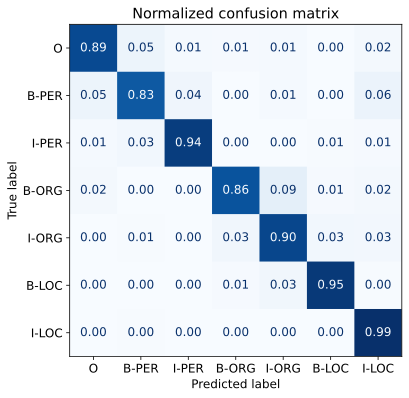

In [40]:
plot_confusion_matrix(df_tokens["labels"], df_tokens["predicted_label"],
                      tags.names)

In [41]:

def get_samples(df):
    for _, row in df.iterrows():
        labels, preds, tokens, losses = [], [], [], []
        for i, mask in enumerate(row["attention_mask"]):
            if i not in {0, len(row["attention_mask"])}:
                labels.append(row["labels"][i])
                preds.append(row["predicted_label"][i])
                tokens.append(row["input_tokens"][i])
                losses.append(f"{row['loss'][i]:.2f}")
        df_tmp = pd.DataFrame({"tokens": tokens, "labels": labels,
                               "preds": preds, "losses": losses}).T
        yield df_tmp

df["total_loss"] = df["loss"].apply(sum)
df_tmp = df.sort_values(by="total_loss", ascending=False).head(3)

for sample in get_samples(df_tmp):
    display(sample)
'''
Î†àÏù¥Î∏îÎì§Ïù¥ Î¨∏Ï†úÍ∞Ä ÎßéÏùå 3Î≤àÏß∏ Î≥¥Î©¥ united nationsÍ∞Ä perÎ°ú ÎßµÌïëÎê® (UN Í∏∞Íµ¨)
ÏÇ¨Ïö©Ìïú Îç∞Ïù¥ÌÑ∞ÏÖã PAN-XÏù¥ Î†àÏù¥Î∏îÏùÑ ÏûêÎèôÏúºÎ°ú ÏÉùÏÑ±ÌïòÎ©∞ ÏÉùÍ∏¥ Î¨∏Ï†úÍ∞ôÏùå

Î†àÏù¥Î∏îÏùÑ ÏûêÎèôÏúºÎ°ú ÏÉùÏÑ±-> Ïã§Î≤Ñ Ïä§ÌÉ†Îã§Îìú
Î†àÏù¥Î∏îÏùÑ ÏÇ¨ÎûåÏù¥ ÏÉùÏÑ± -> Í≥®Îìú Ïä§ÌÉ†Îã§Îìú

Î†àÏù¥Î∏î Î¨∏Ï†úÎäî Ïñ¥ÎîîÏÑúÎì† ÏÉùÍ∏∏ÏàòÏûàÏùå
'''

0     1      2      3     4     5      6      7      8      9   \
tokens    ‚ñÅ'   ‚ñÅ''     ‚ñÅŒ§      Œö   ‚ñÅ''    ‚ñÅ'     ‚ñÅ'    ‚ñÅ''     ‚ñÅT    ‚ñÅ''   
labels     O     O      O    IGN     O     O  B-LOC  I-LOC  I-LOC  I-LOC   
preds      O     O  B-ORG  I-ORG     O     O      O      O  B-ORG      O   
losses  0.00  0.00   3.87   0.00  0.00  0.00  11.43  10.31   8.16   7.75   

           10    11     12     13    14     15     16    17    18  
tokens     ‚ñÅ'    ri    ‚ñÅ''     ‚ñÅ'     k    ‚ñÅ''     ‚ñÅ'   ala  </s>  
labels  I-LOC   IGN  I-LOC  I-LOC   IGN  I-LOC  I-LOC   IGN   IGN  
preds       O     O      O      O     O      O      O     O     O  
losses   8.63  0.00   7.15   8.53  0.00   8.12   8.65  0.00  0.00

0     1     2      3      4      5         6     7      8      9   \
tokens    ‚ñÅ''     8     .  ‚ñÅJuli    ‚ñÅ''     ‚ñÅ:  ‚ñÅProtest  camp   ‚ñÅauf   ‚ñÅdem   
labels  B-ORG   IGN   IGN  I-ORG  I-ORG  I-ORG     I-ORG   IGN  I-ORG  I-ORG   
preds       O     O     O      O      O      O         O     O      O      O   
losses   7.52  0.00  0.00   7.64   9.08   9.09      6.82  0.00   7.13   9.71   

              10     11          12     13      14     15     16    17  
tokens  ‚ñÅGel√§nde   ‚ñÅder  ‚ñÅRepublika      n  ischen   ‚ñÅGar     de  </s>  
labels     I-ORG  I-ORG       I-ORG    IGN     IGN  I-ORG    IGN   IGN  
preds          O      O       B-ORG  I-ORG   I-ORG  I-ORG  I-ORG     O  
losses      7.66   6.85        5.46   0.00    0.00   0.01   0.00  0.00

0         1       2            3         4      5        6   \
tokens  ‚ñÅUnited  ‚ñÅNations  ‚ñÅMulti  dimensional  ‚ñÅIntegra    ted  ‚ñÅStabil   
labels    B-PER     I-PER   I-PER          IGN     I-PER    IGN    I-PER   
preds     B-ORG     I-ORG   I-ORG        I-ORG     I-ORG  I-ORG    I-ORG   
losses     6.71      6.78    6.60         0.00      6.65   0.00     6.37   

             7         8      9      10        11        12         13     14  
tokens  ization  ‚ñÅMission    ‚ñÅin   ‚ñÅthe  ‚ñÅCentral  ‚ñÅAfrican  ‚ñÅRepublic   </s>  
labels      IGN     I-PER  I-PER  I-PER     I-PER     I-PER      I-PER    IGN  
preds     I-ORG     I-ORG  I-ORG  I-ORG     I-ORG     I-ORG      I-ORG  I-ORG  
losses     0.00      5.91   5.95   5.99      6.24      6.31       5.98   0.00

In [42]:
df_tmp = df.loc[df["input_tokens"].apply(lambda x: u"\u2581(" in x)].head(2)
for sample in get_samples(df_tmp):
    display(sample)

#Í¥ÑÌò∏ ÏïàÏóê Ìè¨Ìï®Îêú Îã®Ïñ¥Ïùò Î†àÏù¥Î∏îÎ°ú Ïù∏Ìï¥ ÏÉùÍ∏∞Îäî ÏÜêÏã§Ïù¥ ÍµâÏû•Ìûà ÌÅº
#Í¥ÑÌò∏ ÏïàÏóê Îã®Ïñ¥Îäî ÏÉÅÌô©Ïóê Îî∞Îùº ÎÑàÎ¨¥ Ïì∞ÏûÑÏù¥ Îã¨ÎùºÏÑú ÏÉùÍ∏∞ÎäîÎìØ?
#Ïù¥Í±∏ ÏúÑÌï¥ Îã§ÏñëÌïú Î∞©Î≤ïÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Ï†ïÏ†úÌï¥ÏïºÌï®

0      1      2             3      4      5
tokens   ‚ñÅHam      a     ‚ñÅ(  ‚ñÅUnternehmen     ‚ñÅ)   </s>
labels  B-ORG    IGN  I-ORG         I-ORG  I-ORG    IGN
preds   B-ORG  I-ORG  I-ORG         I-ORG  I-ORG  I-ORG
losses   0.01   0.00   0.01          0.01   0.01   0.00

0      1      2      3      4      5      6      7
tokens  ‚ñÅKesk    k√ºl      a     ‚ñÅ(  ‚ñÅMart     na     ‚ñÅ)   </s>
labels  B-LOC    IGN    IGN  I-LOC  I-LOC    IGN  I-LOC    IGN
preds   B-LOC  I-LOC  I-LOC  I-LOC  I-LOC  I-LOC  I-LOC  I-LOC
losses   0.02   0.00   0.00   0.01   0.01   0.00   0.01   0.00

In [43]:
def get_f1_score(trainer, dataset):
    return trainer.predict(dataset).metrics["test_f1"]

In [44]:
f1_scores = defaultdict(dict)
f1_scores["de"]["de"] = get_f1_score(trainer, panx_de_encoded["test"])
print(f"[de] Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú [de] Î™®Îç∏Ïùò F1-Ï†êÏàò: {f1_scores['de']['de']:.3f}")
#F1 Ï†êÏàò 0.872Ï†ê
#ÏùºÎ∞òÏ†ÅÏù∏ NER ÏûëÏóÖÏóêÏÑú Ïù¥Ï†ïÎèÑÎ©¥ Í¥úÏ∞ÆÏùÄ Ï†êÏàò
#ORGÍ∞Ä ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÅÍ≥† Ï°∞ÏßÅÎ™ÖÏù¥ ÎÑàÎ¨¥ ÎßéÏùÄÎç∞ Ïñ¥Ìúò ÏÇ¨Ï†ÑÏóêÏÑúÎäî Î™®Îì† Ï†ïÎ≥¥Í∞Ä ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê Î¨∏Ï†úÍ∞Ä ÏÉùÍπÄ ÌäπÌûà ORGÏóêÏÑú Í∞ÄÏû• ÌÅ∞ Ïñ¥Î†§ÏõÄ Í≤™Ïùå
#Îã§Î•∏ Ïñ∏Ïñ¥Îäî Ïñ¥Îñ®Íπå? ÏßÄÍ∏àÏùÄ ÎèÖÏùºÏñ¥ ÏòÄÏùå ÌîÑÎûëÏä§Ïñ¥Î°ú ÎØ∏ÏÑ∏ÌäúÎãù ÏßÑÌñâ

[de] Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú [de] Î™®Îç∏Ïùò F1-Ï†êÏàò: 0.872


In [45]:
text_fr = "Jeff Dean est informaticien chez Google en Californie"
tag_text(text_fr, tags, trainer.model, xlmr_tokenizer)

0      1      2      3     4            5    6      7        8   \
Tokens    <s>  ‚ñÅJeff    ‚ñÅDe     an  ‚ñÅest  ‚ñÅinformatic  ien  ‚ñÅchez  ‚ñÅGoogle   
Tags    B-PER  B-PER  I-PER  I-PER     O            O    O      O    B-ORG   

         9      10     11     12     13  
Tokens  ‚ñÅen  ‚ñÅCali    for    nie   </s>  
Tags      O  B-LOC  I-LOC  I-LOC  B-PER

In [46]:
def evaluate_lang_performance(lang, trainer):
    panx_ds = encode_panx_dataset(panx_ch[lang])
    return get_f1_score(trainer, panx_ds["test"])
f1_scores["de"]["fr"] = evaluate_lang_performance("fr", trainer)
print(f"[fr] Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú [de] Î™®Îç∏Ïùò F1-Ï†êÏàò: {f1_scores['de']['fr']:.3f}")

Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

[fr] Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú [de] Î™®Îç∏Ïùò F1-Ï†êÏàò: 0.695


In [47]:
f1_scores["de"]["it"] = evaluate_lang_performance("it", trainer)
print(f"[it] Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú [de] Î™®Îç∏Ïùò F1-Ï†êÏàò: {f1_scores['de']['it']:.3f}")

Map:   0%|          | 0/1680 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

[it] Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú [de] Î™®Îç∏Ïùò F1-Ï†êÏàò: 0.677


In [48]:
f1_scores["de"]["en"] = evaluate_lang_performance("en", trainer)
print(f"[en] Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú [de] Î™®Îç∏Ïùò F1-Ï†êÏàò: {f1_scores['de']['en']:.3f}")

Map:   0%|          | 0/1180 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

[en] Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú [de] Î™®Îç∏Ïùò F1-Ï†êÏàò: 0.587


ÏúÑÏóê Í≤∞Í≥ºÎì§ÏùÑ Î≥¥Î©¥ Ïö∞Î¶¨Îäî ÎèÖÏùºÏñ¥ Îç∞Ïù¥ÌÑ∞Îßå Ïù¥Ïö©Ìï¥ÏÑú ÌïôÏäµÏùÑ ÏßÑÌñâÌñàÏùå   
Í∑∏Îü∞Îç∞ Îã§Î•∏ ÎÇòÎùº Ïñ∏Ïñ¥ÎèÑ ÏÑ±Îä•Ïù¥ Ï¢ãÏßÄÏïäÏßÄÎßå ÏùºÎã® Í∞ÄÎä• ÌïòÎã§Îäî Í≤ÉÏùÑ Î≥¥Ïó¨Ï§å
Ïù¥Î†áÍ≤å ÏãúÌñâÌï¥Î≥∏Í≤å **Ï†úÎ°ú ÏÉ∑ Ï†ÑÏù¥ ÌïôÏäµ**ÏûÑ  
Ï∂îÍ∞Ä ÌïôÏäµ ÏóÜÏù¥ Îã§Î•∏ Îç∞Ïù¥ÌÑ∞ Ïù¥Ïö©Ìï¥ÏÑú Í≤∞Í≥ºÎßå Î≥¥Îäî Í≤É

In [49]:
def train_on_subset(dataset, num_samples):
    train_ds = dataset["train"].shuffle(seed=42).select(range(num_samples))
    valid_ds = dataset["validation"]
    test_ds = dataset["test"]
    training_args.logging_steps = len(train_ds) // batch_size

    trainer = Trainer(model_init=model_init, args=training_args,
        data_collator=data_collator, compute_metrics=compute_metrics,
        train_dataset=train_ds, eval_dataset=valid_ds, tokenizer=xlmr_tokenizer)
    trainer.train()
    if training_args.push_to_hub:
        trainer.push_to_hub(commit_message="Training completed!")

    f1_score = get_f1_score(trainer, test_ds)
    return pd.DataFrame.from_dict(
        {"num_samples": [len(train_ds)], "f1_score": [f1_score]})

In [50]:
panx_fr_encoded = encode_panx_dataset(panx_ch["fr"])

Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

In [51]:
training_args.push_to_hub = False
metrics_df = train_on_subset(panx_fr_encoded, 250)
metrics_df

num_samples  f1_score
0          250  0.609427

In [52]:
for num_samples in [500, 1000, 2000, 4000]:
    metrics_df = pd.concat([
        metrics_df,
        train_on_subset(panx_fr_encoded, num_samples)])


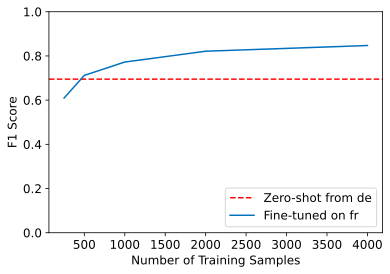

In [53]:
fig, ax = plt.subplots()
ax.axhline(f1_scores["de"]["fr"], ls="--", color="r")
metrics_df.set_index("num_samples").plot(ax=ax)
plt.legend(["Zero-shot from de", "Fine-tuned on fr"], loc="lower right")
plt.ylim((0, 1))
plt.xlabel("Number of Training Samples")
plt.ylabel("F1 Score")
plt.show()
'''
Ï∂îÍ∞Ä ÌïôÏäµ ÏãúÌÇ® Í≤É Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßéÏùÑÏàòÎ°ù ÌïôÏäµÏùÄ ÏûòÎê® Í∑ºÎç∞ Ïù¥Í≤å ÏùòÎØ∏ÏûàÎÇò ÎèÖÏùºÏñ¥ÎèÑ ÎßàÏ†Ä ÏûòÌïòÎÇò?
'''

In [54]:
from datasets import concatenate_datasets

def concatenate_splits(corpora):
    multi_corpus = DatasetDict()
    for split in corpora[0].keys():
        multi_corpus[split] = concatenate_datasets(
            [corpus[split] for corpus in corpora]).shuffle(seed=42)
    return multi_corpus
'''
Îì§Ïñ¥Ïò§Îäî Îç∞Ïù¥ÌÑ∞Î•º ÎûúÎç§ÌïòÍ≤å Ìï©ÏπòÍ≥† ÏÖîÌîå
'''

In [55]:
panx_de_fr_encoded = concatenate_splits([panx_de_encoded, panx_fr_encoded])

In [56]:
training_args.logging_steps = len(panx_de_fr_encoded["train"]) // batch_size
training_args.push_to_hub = True
training_args.output_dir = "xlm-roberta-base-finetuned-panx-de-fr"

trainer = Trainer(model_init=model_init, args=training_args,
    data_collator=data_collator, compute_metrics=compute_metrics,
    tokenizer=xlmr_tokenizer, train_dataset=panx_de_fr_encoded["train"],
    eval_dataset=panx_de_fr_encoded["validation"])

trainer.train()
trainer.push_to_hub(commit_message="Training completed!")

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/5.18k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/kwkwkwkwpark/xlm-roberta-base-finetuned-panx-de-fr/commit/c3973ba5c166513dd146de7ec65e5053d8f62954', commit_message='Training completed!', commit_description='', oid='c3973ba5c166513dd146de7ec65e5053d8f62954', pr_url=None, pr_revision=None, pr_num=None)

In [57]:
for lang in langs:
    f1 = evaluate_lang_performance(lang, trainer)
    print(f"[{lang}] Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú [de-fr] Î™®Îç∏Ïùò F1-Ï†êÏàò: {f1:.3f}")

'''
ÎèÖÏùºÏñ¥Îûë ÌîÑÎûëÏä§Ïñ¥Î°ú ÌïôÏäµÏùÑ ÏãúÏºØÎäîÎç∞ Ïù¥ÌÉàÎ¶¨ÏïÑÏñ¥Îûë ÏòÅÏñ¥Ïùò ÏÑ±Îä•ÍπåÏßÄ Ïò¨ÎùºÍ∞ÄÎ≤ÑÎ¶º
Îã§Ï§ë Ïñ∏Ïñ¥ ÌïôÏäµÏù¥ ÎêòÍ≥†Ïûà
'''

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

[de] Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú [de-fr] Î™®Îç∏Ïùò F1-Ï†êÏàò: 0.868


[fr] Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú [de-fr] Î™®Îç∏Ïùò F1-Ï†êÏàò: 0.867


[it] Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú [de-fr] Î™®Îç∏Ïùò F1-Ï†êÏàò: 0.817


[en] Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú [de-fr] Î™®Îç∏Ïùò F1-Ï†êÏàò: 0.676


In [59]:
corpora = [panx_de_encoded]

# Î∞òÎ≥µÏóêÏÑú ÎèÖÏùºÏñ¥Îäî Ï†úÏô∏Ìï©ÎãàÎã§.
for lang in langs[1:]:
    training_args.output_dir = f"xlm-roberta-base-finetuned-panx-{lang}"
    # Îã®Ïùº Ïñ∏Ïñ¥ ÎßêÎ≠âÏπòÏóêÏÑú ÎØ∏ÏÑ∏ ÌäúÎãùÌï©ÎãàÎã§.
    ds_encoded = encode_panx_dataset(panx_ch[lang])
    metrics = train_on_subset(ds_encoded, ds_encoded["train"].num_rows)
    # ÎîïÏÖîÎÑàÎ¶¨Ïóê F1-Ï†êÏàòÎ•º Î™®ÏùçÎãàÎã§.
    f1_scores[lang][lang] = metrics["f1_score"][0]
    # Îã®Ïùº Ïñ∏Ïñ¥ ÎßêÎ≠âÏπòÎ•º corpora Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞ÄÌï©ÎãàÎã§.
    corpora.append(ds_encoded)


#Î™®Îì† Ïñ∏Ïñ¥Ïóê ÎåÄÌïòÏó¨ ÎØ∏ÏÑ∏ ÌäúÎãù ÏßÑÌñâ

In [60]:
corpora_encoded = concatenate_splits(corpora)

In [61]:
training_args.logging_steps = len(corpora_encoded["train"]) // batch_size
training_args.output_dir = "xlm-roberta-base-finetuned-panx-all"

trainer = Trainer(model_init=model_init, args=training_args,
    data_collator=data_collator, compute_metrics=compute_metrics,
    tokenizer=xlmr_tokenizer, train_dataset=corpora_encoded["train"],
    eval_dataset=corpora_encoded["validation"])

trainer.train()
trainer.push_to_hub(commit_message="Training completed!")
#ÏßÑÏßú Î™®Îì† Ïñ∏Ïñ¥ ÌÜµÌï©Ìï¥ÏÑú ÌïôÏäµ ÏßÑÌñâ Ïò§ÎûòÍ±∏Î¶¨Í∏¥Ìïò

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.18k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/kwkwkwkwpark/xlm-roberta-base-finetuned-panx-all/commit/37111c6b47136de9b3cb4bfa36f78306ed3cb706', commit_message='Training completed!', commit_description='', oid='37111c6b47136de9b3cb4bfa36f78306ed3cb706', pr_url=None, pr_revision=None, pr_num=None)

In [62]:
for idx, lang in enumerate(langs):
    f1_scores["all"][lang] = get_f1_score(trainer, corpora[idx]["test"])

In [63]:
scores_data = {"de": f1_scores["de"],
               "each": {lang: f1_scores[lang][lang] for lang in langs},
               "all": f1_scores["all"]}
f1_scores_df = pd.DataFrame(scores_data).T.round(4)
f1_scores_df.rename_axis(index="Fine-tune on", columns="Evaluated on",
                         inplace=True)
f1_scores_df

'''
Í≤∞Í≥ºÎ•º Î≥¥Î©¥ ÎèÖÏùºÏñ¥,ÌîÑÎûëÏä§Ïñ¥,Ïù¥ÌÉàÎ¶¨ÏïÑÏñ¥ Îäî ÎπÑÏä∑Ìïú ÏÑ±Îä•ÏùÑ Î≥¥Ïó¨Ï§å ÌïòÏßÄÎßå ÏòÅÏñ¥Îäî ÎπÑÍµêÏ†Å ÎÇÆÏùå
ÏùºÎ∞òÏ†ÅÏù∏ Ï†ÑÎûµÏúºÎ°ú ÏùºÎ≥∏Ïñ¥Ï≤òÎüº Îã§Î•∏ Ï¢ÖÎ•òÏùò ÌÖçÏä§Ìä∏Î•º Îã§Î£∞ ÎïåÎäî Ìïú Ïñ¥Ï°± ÎÇ¥ÏóêÏÑú ÍµêÏ∞® Ïñ∏Ïñ¥ Ï†ÑÏù¥Ïóê Ï¥àÏ†êÏùÑ ÎßûÏ∂îÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.(ÌïúÍµ≠Ïñ¥,Ï§ëÍµ≠Ïñ¥,ÏùºÎ≥∏Ïñ¥)
'''

Evaluated on      de      fr      it      en
Fine-tune on                                
de            0.8719  0.6950  0.6774  0.5867
each          0.8719  0.8488  0.8259  0.7132
all           0.8653  0.8692  0.8740  0.7701